In [1]:
import pandas as pd
from IPython.display import display, HTML
from lr.text_processing.util import pre_process_nli_df
from lr.training.util import filter_df_by_label
from lr.text_processing.transformations.wordnet import path_base_transformation
from lr.text_processing.transformations.wordnet import path_base_transformation_p
from lr.text_processing.transformations.wordnet import path_base_transformation_h
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train = pd.read_csv("data/mnli/train.csv")
# dev = pd.read_csv("data/mnli/dev.csv")
# train = train.sample(100000)
# dev = dev.sample(1000)

# train.to_csv("data/mnli/train_sample.csv", index=False)
# train.to_csv("data/mnli/dev_sample.csv", index=False)

In [2]:
original_path = "data/mnli/train_sample.csv" 
transformed_path = "data/mnli/train_p_h_syn_noun.csv"

df = pd.read_csv(original_path)
df = filter_df_by_label(df.dropna()).reset_index(drop=True)
pre_process_nli_df(df)

df_t = path_base_transformation(df, transformed_path)

n = 400 | e_n = 6.8%


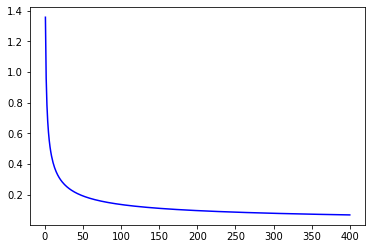

In [3]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

e95 = lambda n: e(0.05, n)
x = np.array(range(1,401))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e_id = eps[n]


print("n = {} | e_n = {:.1%}".format(x[n], e_id))

In [6]:
samples = 500
good = []
bad = []
count = 0

for _ in range(samples):
    count += 1
    original = df.sample()
    id_ = original.index[0]
    print("\noriginal\n")
    display(HTML(original.to_html()))
    modified = df_t.loc[id_].to_frame().transpose()
    print()
    print("\nmodified\n")
    display(HTML(modified.to_html()))
    print("\ndecide\n")
    decision = input()
    if decision == "y":
        good.append(id_)
    elif decision =="n":
        bad.append(id_)
    else:
        break


original



,premise,hypothesis,label
36048,the record is undisputed that many of the kinds of lawsuits involving permanent resident aliens and other unrestricted aliens take months if not years to reach a conclusion and that permanent residents and other eligible aliens regularly travel outside the united states,no one has disputed the record,entailment




modified



,premise,hypothesis,label
36048,the record is undisputed that many of the kinds of case involving permanent occupant aliens and other unrestricted aliens take months if not years to range a decision and that permanent residents and other eligible aliens regularly travel outside the united states,no one has disputed the record,entailment



decide



 y



original



,premise,hypothesis,label
75805,as a young man approaching 40 i am confused about how i am supposed to react to womens fashions,i am worried that complimenting a woman for her fashion sense will make me appear sexist,neutral




modified



,premise,hypothesis,label
75805,as a young adult male approaching 40 i am confused about how i am supposed to respond to woman way,i am worried that complimenting a adult female for her fashion sense will make me look male chauvinist,neutral



decide



 n



original



,premise,hypothesis,label
29316,but unlike the manhattan projectin fact like no other big science project in historythe genome project has equipped itself with a research division to explore the social and ethical ramifications of genetics,the genome project did not equip itself with any research divisions,contradiction




modified



,premise,hypothesis,label
29316,but unlike the manhattan projectin fact like no other large scientific discipline labor in historythe genome labor has equipped itself with a research division to explore the social and ethical fork of genetic science,the genome labor did not equip itself with any research divisions,contradiction



decide



 y



original



,premise,hypothesis,label
99639,id made my plan whilst i was waiting for her,i sat on the bed while i waited for her,neutral




modified



,premise,hypothesis,label
99639,id do my program whilst i was waiting for her,i sat on the bed while i waited for her,neutral



decide



 y



original



,premise,hypothesis,label
47484,5 the iron giant brad birds cartoon evocation of leftist 50s scifi is uncannily it sums up an entire era of ideological genre moviemakingand transcends it,the iron giant redefined the 1950s science fiction genre leading to a strong impact on future moviemakers,neutral




modified



,premise,hypothesis,label
47484,5 the iron giant brad birds sketch evocation of leftist 50s scifi is uncannily it amount up an entire epoch of ideological genre moviemakingand transcends it,the iron giant redefined the fifties scientific discipline fiction genre leading to a strong impact on hereafter moviemakers,neutral



decide



 y



original



,premise,hypothesis,label
49143,in addition he said several foundations that give money to the laf have seen their endowments shrink with the declining stock market and the money available from the interest on lawyers trust accounts program also has dwindled as interest rates have approached zero,none of the foundations have had their endowments shrink over time,contradiction




modified



,premise,hypothesis,label
49143,in add-on he state several foundations that spring money to the laf have seen their gift shrink with the declining stock marketplace and the money available from the involvement on lawyers trust story plan too has dwindled as involvement rates have approached zero,none of the foundations have had their gift shrink over time,contradiction



decide



 y



original



,premise,hypothesis,label
85674,but theres no ethical stricture against reporters who arent getting spoonfed by starr pursuing the story of how and why and to whom the independent counsels office is leaking,there were no leaks coming from starrs office,contradiction




modified



,premise,hypothesis,label
85674,but theres no ethical stenosis against reporters who arent getting spoonfed by starr pursuing the tale of how and why and to whom the independent counsels business office is leaking,there were no leaks coming from starrs business office,contradiction



decide



 y



original



,premise,hypothesis,label
59707,we are going to have increases in medicare and medicaid and a reduction in the rate of growth,medicare and medicaid will go up and the rate of growth will go down,entailment




modified



,premise,hypothesis,label
59707,we are going to have addition in medicare and medicaid and a decrease in the rate of development,medicare and medicaid will tour up and the rate of development will tour down,entailment



decide



 y



original



,premise,hypothesis,label
89006,the place was built in 1607 by henri iv whose equestrian statue can be seen on the nearby pontneuf,henry iv ordered that the construction be completed in 6 years,neutral




modified



,premise,hypothesis,label
89006,the place was built in 1607 by henri quartet whose equestrian statue can be seen on the nearby pontneuf,h quartet ordered that the building be completed in 6 years,neutral



decide



 y



original



,premise,hypothesis,label
19433,sure im from home,that is acceptable home is where i am from,entailment




modified



,premise,hypothesis,label
19433,sure im from place,that is acceptable place is where i am from,entailment



decide



 n



original



,premise,hypothesis,label
55910,but no political campaign is worth sacrificing our principles,we are proud of our principles,neutral




modified



,premise,hypothesis,label
55910,but no political run is worth sacrificing our rule,we are proud of our rule,neutral



decide



 y



original



,premise,hypothesis,label
92377,my head swam,my head sank,contradiction




modified



,premise,hypothesis,label
92377,my head swim,my head sank,contradiction



decide



 y



original



,premise,hypothesis,label
95876,dozens and dozens of sites such as eye on the world celebrate tsunamis typhoons hurricanes droughts andof coursetornadoes,sites that celebrate tsunamis are illegal and therefore cannot be found,contradiction




modified



,premise,hypothesis,label
95876,lots and lots of sites such as optic on the creation keep tsunamis typhoons hurricanes droughts andof coursetornadoes,sites that keep tsunamis are illegal and therefore cannot be found,contradiction



decide



 n



original



,premise,hypothesis,label
37855,but every i run my vcr while im at work i tape that and i watch it every evening when i come home and i dont know what it is about that show thats different about other talk shows,i set my vcr everyday to stop recording after the show is over,neutral




modified



,premise,hypothesis,label
37855,but every i run my vcr while im at work i tape that and i watch it every evening when i come place and i dont know what it is about that show thats different about other talk shows,i set my vcr routine to stop recording after the show is over,neutral



decide



 n



original



,premise,hypothesis,label
47674,the cheers got cheerier,the crowd got louder,neutral




modified



,premise,hypothesis,label
47674,the cheers get cheerier,the crowd get louder,neutral



decide



 y



original



,premise,hypothesis,label
6034,ours may have a trouser problem but yours is a no one knew quite what to do with yeltsins thricerepeated warning that an american attack on baghdad would bring on world war iii,no one heeded yeltsins warnings about an eminent world war,neutral




modified



,premise,hypothesis,label
6034,ours may have a pant job but yours is a no one knew quite what to do with yeltsins thricerepeated warning that an american onslaught on baghdad would bring on creation warfare trinity,no one heeded yeltsins warnings about an eminent creation warfare,neutral



decide



 y



original



,premise,hypothesis,label
75274,you cannot mean to shoot me,there is no way that you could intend to shoot me,entailment




modified



,premise,hypothesis,label
75274,you cannot mean to shoot me,there is no way that you could intend to shoot me,entailment



decide



 y



original



,premise,hypothesis,label
45082,by authorizing processing in a system a manager accepts the risks associated with it,a manager accepts that there are associated risks,entailment




modified



,premise,hypothesis,label
45082,by authorizing processing in a system a manager accepts the risks associated with it,a manager accepts that there are associated risks,entailment



decide



 y



original



,premise,hypothesis,label
58024,it bears inscriptions in three varieties of arabic script and leads to a bridge over the remains of the cityels moat,it has inscriptions in three different kinds of arabic,entailment




modified



,premise,hypothesis,label
58024,it bears inscriptions in three varieties of arabic book and leads to a span over the remains of the cityels fosse,it has inscriptions in three different kinds of arabic,entailment



decide



 y



original



,premise,hypothesis,label
53775,waste occurs because of coordination failures in the early days of railroads each line had a different gauge,problems in coordination lead to wastage on the railroad,entailment




modified



,premise,hypothesis,label
53775,waste matter occurs because of coordination failures in the early years of railway each line had a different gage,problems in coordination lead to wastage on the railway,entailment



decide



 y



original



,premise,hypothesis,label
42325,not that such a sale was a favor rennie ought to be glad to get such blood for the range,rennie should be glad to receive such blood for the range,entailment




modified



,premise,hypothesis,label
42325,not that such a sale was a favour rennie ought to be glad to get such blood for the scope,rennie should be glad to receive such blood for the scope,entailment



decide



 y



original



,premise,hypothesis,label
34762,it it must be i bet you know i i im not knocking the garbage men i mean theyre necessary but theres a lot of unemployed people out there who would gladly take jobs as garbage men rate for less money,no one wants to become a garbage man no matter how much you pay them,contradiction




modified



,premise,hypothesis,label
34762,it it must be i stake you know i i im not knocking the scraps men i mean theyre necessary but theres a lot of unemployed people out there who would gladly take business as scraps men rate for less money,no one deprivation to go a scraps adult male no thing how much you salary them,contradiction



decide



 n



original



,premise,hypothesis,label
32778,yeah so you have a break too,you dont ever get a break,contradiction




modified



,premise,hypothesis,label
32778,yeah so you have a interruption too,you dont ever get a interruption,contradiction



decide



 y



original



,premise,hypothesis,label
10676,the 1988 amendments to the inspector general act of 1978 1978 act required lsc to establish an office of inspector general oig and extended specific provisions of the 1978 act to lsc,an office of inspector general should be established by the lsc according to the 1988 amendments to the inspector general act of 1978,entailment




modified



,premise,hypothesis,label
10676,the 1988 amendments to the inspector full general enactment of 1978 1978 enactment required lsc to launch an business office of inspector full general oig and extended particular provender of the 1978 enactment to lsc,an business office of inspector full general should be established by the lsc according to the 1988 amendments to the inspector full general enactment of 1978,entailment



decide



 y



original



,premise,hypothesis,label
31782,thank you for having me here this morning,thanks for having me this morning,entailment




modified



,premise,hypothesis,label
31782,give thanks you for having me here this morning,thanks for having me this morning,entailment



decide



 y



original



,premise,hypothesis,label
45080,i think then thats a step away from even duty i dont think they even have a sense of the responsibility,i know they feel a lot of responsibility,contradiction




modified



,premise,hypothesis,label
45080,i think then thats a measure away from even responsibility i dont think they even have a sense of the duty,i know they feel a lot of duty,contradiction



decide



 y



original



,premise,hypothesis,label
46824,theres a small zoo area where you can see snakes lizards birds of prey wolves hyenas foxes and various desert cats including cheetahs and leopards,the zoo is home to some endangered desert animals,neutral




modified



,premise,hypothesis,label
46824,theres a small zoo country where you can see snakes lizards birds of target wolf hyenas foxes and assorted desert cats including cheetahs and leopards,the zoo is place to some endangered desert animals,neutral



decide



 y



original



,premise,hypothesis,label
56297,i myself in company with the police went to the deceaseds room and whilst there i apparently accidentally knocked over the table in question but found that as i had expected monsieur hastings had heard no sound at all,i went into the deceaseds room and accidentally knocked over the table,entailment




modified



,premise,hypothesis,label
56297,i myself in company with the police went to the deceaseds room and whilst there i apparently accidentally knocked over the table in inquiry but found that as i had expected monsieur hastings had hear no sound at all,i went into the deceaseds room and accidentally knocked over the table,entailment



decide



 y



original



,premise,hypothesis,label
11802,oh who knows you know its always something with homes,homes are full of surprises,neutral




modified



,premise,hypothesis,label
11802,oh who knows you know its always something with place,place are full of surprises,neutral



decide



 n



original



,premise,hypothesis,label
60397,adrin found those few more,adrin found a few more of those,entailment




modified



,premise,hypothesis,label
60397,adrin found those few more,adrin found a few more of those,entailment



decide



 y



original



,premise,hypothesis,label
24667,a chilling story about an american mans murder of his mailorder wife exposes the dark side of the hiredbride industry,the story about the american man and his mailorder wife was an acceptable event for the operation of the hiredbride industry,contradiction




modified



,premise,hypothesis,label
24667,a chilling tale about an american mans execution of his mailorder married woman exposes the dark side of the hiredbride industry,the tale about the american adult male and his mailorder married woman was an acceptable event for the operation of the hiredbride industry,contradiction



decide



 y



original



,premise,hypothesis,label
12247,as srivijaya declined in the 14th century the malay peninsula was carved up among cambodia thailand and the javanese hindu empire of majapahit,srivijaya thrived in the 14th century,contradiction




modified



,premise,hypothesis,label
12247,as srivijaya declined in the 14th century the malay peninsula was carved up among cambodia thailand and the javanese hindu imperium of majapahit,srivijaya thrived in the 14th century,contradiction



decide



 y



original



,premise,hypothesis,label
83411,a new study indicates that fiber doesnt prevent colon cancer the study followed 88000 women for 16 years,fiber is not related to colon cancer at all,neutral




modified



,premise,hypothesis,label
83411,a new survey point that fibre doesnt preclude colon malignant neoplastic disease the survey followed 88000 women for 16 years,fibre is not related to colon malignant neoplastic disease at all,neutral



decide



 y



original



,premise,hypothesis,label
11255,its a little fishing village that is,its a small village for fishing,entailment




modified



,premise,hypothesis,label
11255,its a little fishing settlement that is,its a small settlement for fishing,entailment



decide



 y



original



,premise,hypothesis,label
53655,for example the unified agenda of federal regulatory and deregulatory actions is published in the federal register twice each year by the regulatory information service center risc 1 and provides uniform reporting of data on regulatory activities under development throughout the federal government,the unified agenda of federal regulatory and deregulatory actions has been an active part of development through federal government,entailment




modified



,premise,hypothesis,label
53655,for instance the unified schedule of federal regulatory and deregulatory actions is published in the federal registry twice each yr by the regulatory info service heart risc 1 and provides uniform reporting of information on regulatory activities under development throughout the federal authorities,the unified schedule of federal regulatory and deregulatory actions has be an active portion of development through federal authorities,entailment



decide



 y



original



,premise,hypothesis,label
77721,she clenched her teeth and the man smiled at her as he slowly pulled her closer wrapping the chain around his forearms,the man tied himself to the woman,neutral




modified



,premise,hypothesis,label
77721,she clenched her dentition and the adult male smiled at her as he slowly pulled her closer wrapping the concatenation around his forearms,the adult male tied himself to the adult female,neutral



decide



 n



original



,premise,hypothesis,label
93390,yeah well its its nice to get somebody to help you with the rent and everything but uh at the end of ten years what are you going to have,it is great to have someone to help with rent payments,entailment




modified



,premise,hypothesis,label
93390,yeah well its its nice to get somebody to aid you with the rent and everything but uh at the end of decade years what are you going to have,it is great to have someone to aid with rent payments,entailment



decide



 y



original



,premise,hypothesis,label
8521,i pray to god but i do not feel that i am praying to an exclusively jewish god,i feel that i am praying to an absolutely universal god who is accessible to everyone,neutral




modified



,premise,hypothesis,label
8521,i pray to god but i do not feel that i am praying to an exclusively jewish god,i feel that i am praying to an absolutely universal god who is accessible to everyone,neutral



decide



 y



original



,premise,hypothesis,label
27084,the northwest trick is not so much to create something out of nothing as making something very large out of something small and then repeating the process,making something out of nothing is exactly what has been uncovered with the northwest trick,contradiction




modified



,premise,hypothesis,label
27084,the northwest fast one is not so much to create something out of nothing as making something very large out of something small and then repeating the procedure,making something out of nothing is exactly what has be uncovered with the northwest fast one,contradiction



decide



 y



original



,premise,hypothesis,label
18970,among these rceds review of the department of commerce implementation to take one report examined the actions commerce took that were intended to improve internal controls such as training senior financial analysts in evaluating applicants and borrowers in the troubled eda business loan program and overhauling the way in which computer resources were used for the national weather service,the report examined how commerce improved internal controls,entailment




modified



,premise,hypothesis,label
18970,among these rceds revaluation of the section of commercialism execution to take one study examined the actions commercialism took that were intended to improve internal controls such as training senior financial analysts in evaluating applicants and borrowers in the troubled eda concern loan plan and overhauling the way in which computing device resources were used for the subject weather service,the study examined how commercialism improved internal controls,entailment



decide



 y



original



,premise,hypothesis,label
21721,because the students were increasingly exhibiting symptoms of exhaustion and adhd mr jedynak decided to open sponsored by the companies where the kids parents worked a fully equipped medical facility along with a resuscitation unit a repeated psychiatric intervention unit and a unit for the prevention of premature sexual development,the students were exhausted and a new facility was open where the parents were working,entailment




modified



,premise,hypothesis,label
21721,because the students were increasingly exhibiting symptoms of exhaustion and adhd mr jedynak decided to clear sponsored by the companies where the child parents worked a fully equipped medical installation on with a resuscitation unit of measurement a repeated psychiatric intercession unit of measurement and a unit of measurement for the bar of premature sexual development,the students were exhausted and a new installation was clear where the parents were working,entailment



decide



 h


## CI

In [7]:
n =  count-1
g = len(good) / n
print("count = {}\n".format(n))
print("len(good) = {}\n".format(len(good)))
print("good pct = {:.3f}\n".format(g))


count = 40

len(good) = 33

good pct = 0.825



In [8]:
all_ns = [125, 26, 56, 57]

all_good = [106, 22, 45, 47]

assert len(all_ns) == len(all_good)

n = np.sum(all_ns)
g = np.sum(all_good)
pct = g / n

l = pct - e95(n)
u = pct + e95(n) 

print("count = {}\n".format(n))
print("good pct = {:.1%}\n".format(pct))
print("e95 = {:.2%}\n".format(e95(n)))
print("good 95% pct CI = ({:.1%}, {:.1%})\n".format(l,u))


count = 264

good pct = 83.3%

e95 = 8.36%

good 95% pct CI = (75.0%, 91.7%)



## gathering results

In [9]:
dict_ = {"data": ["SNLI", "SNLI", "SNLI",
                  "MNLI"],
         "transformation": ["Syn Sub P and H",
                            "Syn Sub P only",
                            "Syn Sub H only",
                            "Syn Sub P and H"],
         "acceptance": ["82.2%", "85.0%",
                        "91.5%", "{:.1%}".format(pct)],
         "lower": ["75.5%", "78.2%",
                   "84.7%", "{:.1%}".format(l)],
         "upper":["89.5%", "91.8%",
                  "98.3%", "{:.1%}".format(u)],
         "sample size":[400, 400, 400, n],
         "ok observations":[329, 340, 366, g]}



results = pd.DataFrame(dict_)
results

,data,transformation,acceptance,lower,upper,sample size,ok observations
0,SNLI,Syn Sub P and H,82.2%,75.5%,89.5%,400,329
1,SNLI,Syn Sub P only,85.0%,78.2%,91.8%,400,340
2,SNLI,Syn Sub H only,91.5%,84.7%,98.3%,400,366
3,MNLI,Syn Sub P and H,83.3%,75.0%,91.7%,264,220
